In [1]:
# run if running locally
path = ''

In [2]:
#! remember to remove
%load_ext autoreload
%autoreload 2

import pandas as pd

from funcs.preparation import Preprocessing, FeatureSelection
from funcs.clustering import Clustering
from funcs.integration_exploration import Integration
from funcs.integration_exploration import Exploration


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#setting seaborn visual style in plt

In [3]:
metricFeatures: list[str] = ['Application order','Previous qualification score','Entry score','Age at enrollment','N units credited 1st period',
       'N units taken 1st period', 'N scored units 1st period',
       'N units approved 1st period', 'Average grade 1st period',
       'N unscored units 1st period', 'N units credited 2nd period',
       'N units taken 2nd period', 'N scored units 2nd period',
       'N units approved 2nd period', 'Average grade 2nd period',
       'N unscored units 2nd period','Social Popularity']
categoricalFeatures: list[str] =  ['Application mode','Marital status','Course','Previous qualification','Nationality','Mother\'s qualification',
       'Father\'s qualification','Mother\'s occupation','Father\'s occupation']
boolFeatures: list[str] = ['Morning shift participation','Displaced','Special needs','Debtor','Regularized Fees','Gender_Male','External Funding','International']

In [4]:
academicFeatures: list[str] = ['Previous qualification score','Entry score','N units taken 1st period', 'N scored units 1st period',
       'N units approved 1st period', 'Average grade 1st period',
       'N unscored units 1st period', 'N units credited 2nd period',
       'N units taken 2nd period', 'N scored units 2nd period',
       'N units approved 2nd period', 'Average grade 2nd period',
       'N unscored units 2nd period']
demographicFeatures: list[str] = ['Age at enrollment','Marital status','Course','Previous qualification','Nationality','Mother\'s qualification',
       'Father\'s qualification','Mother\'s occupation','Father\'s occupation','Special needs','International','Debtor','Regularized Fees','Gender_Male']

In [5]:
def runAll(
    metricFeatures: list[str],
    categoricalFeatures: list[str],
    boolFeatures: list[str],
    academicFeatures: list[str],
    demographicFeatures: list[str],
    removedAcademicFeatures: list[str] | list = [],
    removedDemographicFeatures: list[str] | list = [],
    path: str = '',
    *,
    describeDF: bool = False,
    getPairPlot: bool = False,
    nClustersAcademic: int = 0,
    nClustersDemographic: int = 0,
) -> None:
    """_summary_

    Args:
        metricFeatures (list[str]): _description_
        categoricalFeatures (list[str]): _description_
        boolFeatures (list[str]): _description_
        academicFeatures (list[str]): _description_
        demographicFeatures (list[str]): _description_
        path (str, optional): _description_. Defaults to ''.
        describeDF (bool, optional): _description_. Defaults to False.
        getPairPlot (bool, optional): No, just don't please. Defaults to False.
        nClustersAcademic (int, optional): _description_. Defaults to 4.
        nClustersDemographic (int, optional): _description_. Defaults to 4.
    """    
    dataDF: pd.DataFrame = Integration.importdata(path, False)

    if describeDF:
        Exploration.describeData(dataDF, metricFeatures, categoricalFeatures, getBoxPlots=True)
        return

    dataDF, dataAcademic, dataDemographic = Preprocessing.runPreprocessing(dataDF, metricFeatures, boolFeatures, academicFeatures, demographicFeatures, grouping="high")

    dataAcademic.drop(removedAcademicFeatures, axis=1, inplace=True)
    dataDemographic.drop(removedDemographicFeatures, axis=1, inplace=True)

    if getPairPlot:
        FeatureSelection.pairPlots(dataAcademic, "Academic")
        FeatureSelection.pairPlots(dataDemographic, "Demographic")

    Clustering.somWrapper(dataAcademic, "Academic", nClustersAcademic)
    # Clustering.somWrapper(dataDemographic, "Demographic", nClustersDemographic)

In [26]:
removedAcademicFeatures: list[str] = [
    'Average units taken',
    'Average unscored units',
    'Average units credited'
]

# needs to be ran after grouping, maybe change runPreprocessing to accept a list of removed features and drop them before separating?
removedDemographicFeatures: list[str] = [
    'Nationality-Portuguese',
    'Marital status-together',
    'Mother\'s qualification-nan',
    # 'Previous qualification-Higher',
    # 'Mother\'s qualification-Middle',

]

In [ ]:
nationality = [s for s in categoricalFeatures if s.startswith("Nationality")]
course=[s for s in categoricalFeatures if s.startswith("Course")]
prevQual=[s for s in categoricalFeatures if s.startswith("Previous qualification")]



locator: <matplotlib.ticker.AutoLocator object at 0x0000026071B13590>


,Feature 1,Feature 2,Correlation
3,International,Nationality-Portuguese,-1.000000
8,Marital status-alone,Marital status-together,-1.000000
9,Marital status-together,Marital status-alone,-1.000000
46,Nationality-Portuguese,International,-1.000000
59,Mother's qualification-nan,Father's qualification-nan,0.802756
64,Father's qualification-nan,Mother's qualification-nan,0.802756


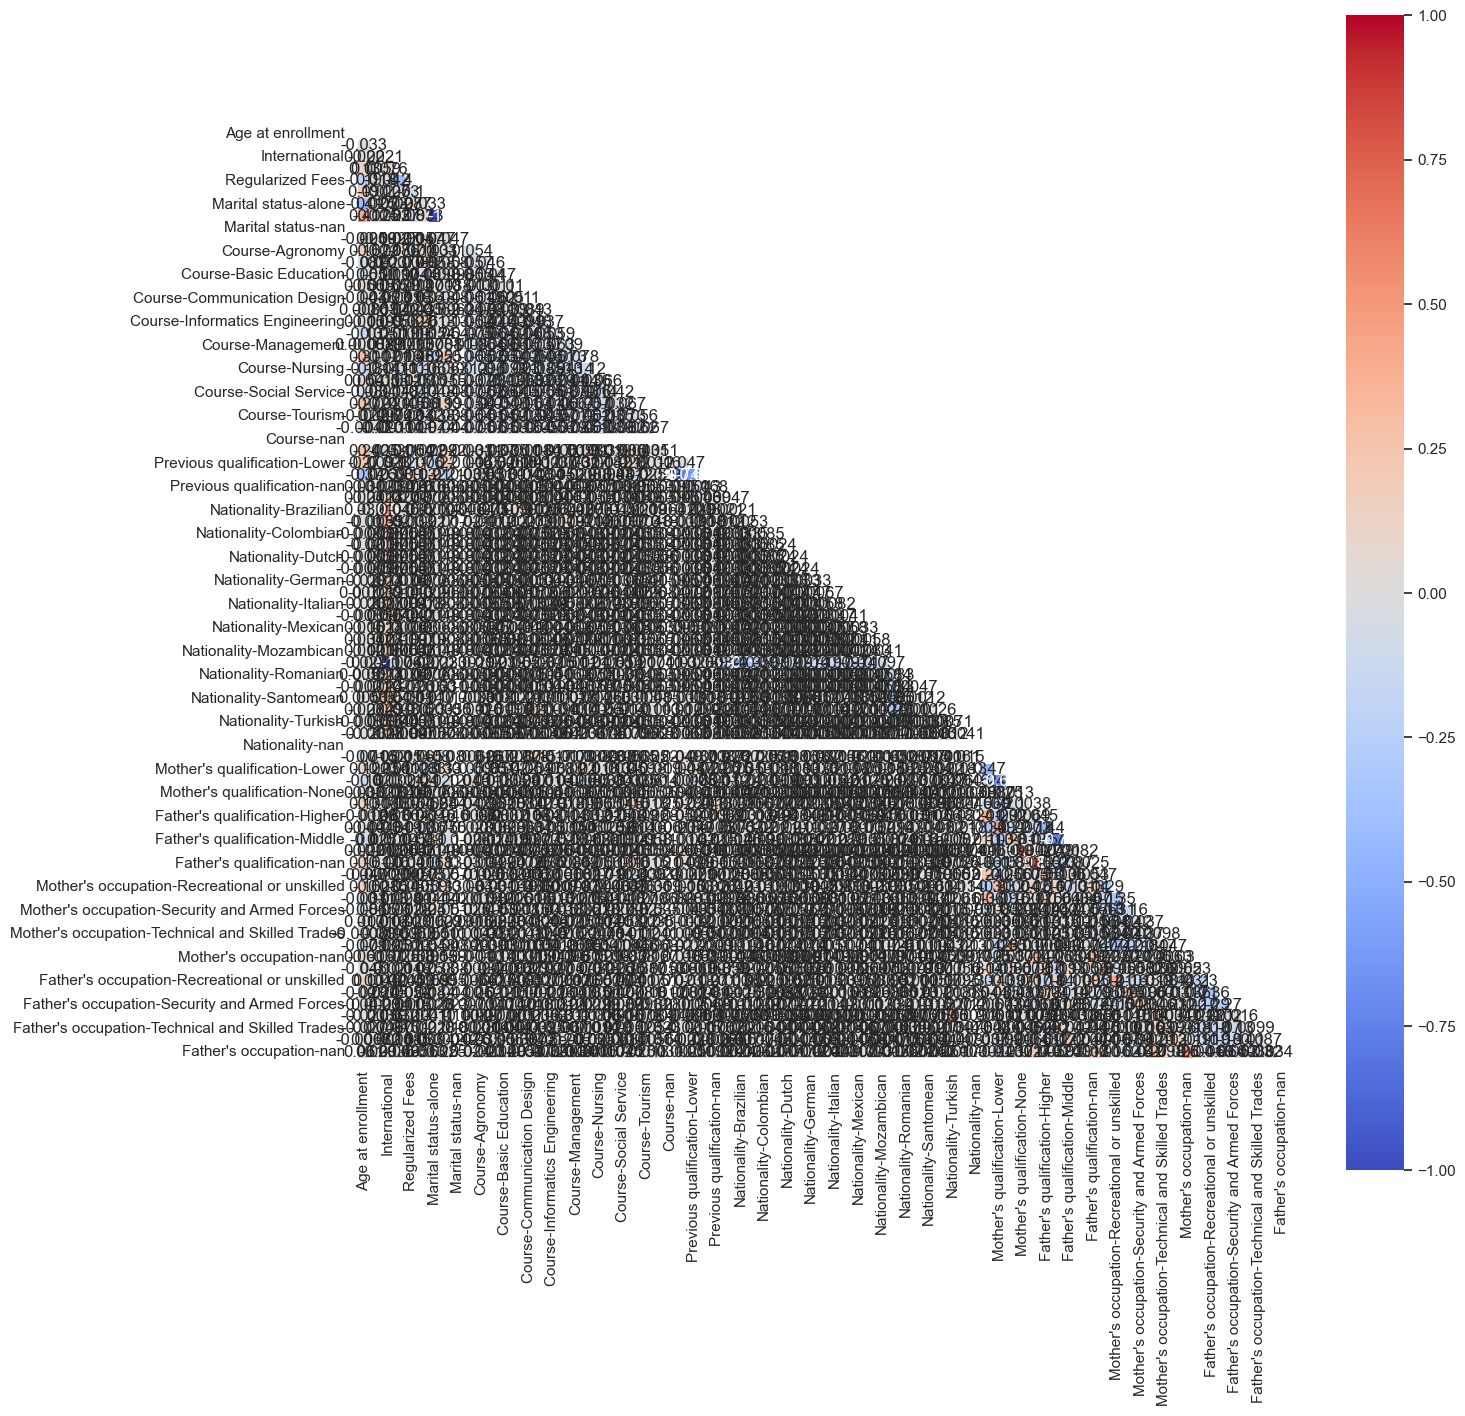

In [29]:
from sklearn.cluster import KMeans
dataDF: pd.DataFrame = Integration.importdata(path, False)
dataDF, dataAcademic, dataDemographic = Preprocessing.runPreprocessing(dataDF, metricFeatures, boolFeatures, academicFeatures, demographicFeatures, grouping="high")
# dataDemographic.drop(removedDemographicFeatures, axis=1, inplace=True)

FeatureSelection.checkCorr(dataDemographic)

# Clustering.kmeansGraphs(dataDemographic)

# kmeans_2 = KMeans(n_clusters = 2, random_state = 100).fit(dataDemographic)
# dataDemographic['label'] = kmeans_2.predict(dataDemographic)
# Clustering.clusterProfiles(dataDemographic, ["label"], figsize=(300, 10))

In [ ]:
print()

In [ ]:
runAll(
    metricFeatures,
    categoricalFeatures,
    boolFeatures,
    academicFeatures,
    demographicFeatures,
    removedAcademicFeatures,
    removedDemographicFeatures,
    path,
    describeDF=False,
    getPairPlot=False,
    nClustersAcademic=3,
    nClustersDemographic=3,
)